## EMPLOYEE ATTRITION


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The goal of the proposed project, "Employee Attrition Prediction," is to develop a machine learning model that accurately predicts the likelihood of employees leaving the company (attrition) based on various features including demographic information, job-related factors


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/patelprashant/employee-attrition
- The data consists of 35 column and 1000  plus rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import   numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\ISMAIL\OneDrive\Documents\mlproject\notebook\data\WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Characteristics of the dataset

In [4]:
df.shape

(1470, 35)

In [5]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### 2.2 Dataset information

. Age: Age of the employee.

. Attrition: Whether the employee has left the company (Yes or No).

. BusinessTravel: Frequency of business travel (Travel_Rarely, Travel_Frequently, Non-Travel).

. DailyRate: Daily rate of pay.

. Department: Department the employee belongs to (e.g., Sales, Research & Development, Human Resources).

. DistanceFromHome: Distance from home to work location.

. Education: Level of education (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor).

. EducationField: Field of education.

. EmployeeCount: Number of employees (always 1 in this dataset).

. EmployeeNumber: Unique identifier for each employee.

. EnvironmentSatisfaction: Satisfaction with the work environment (1: Low, 2: Medium, 3: High, 4: Very High).

. Gender: Gender of the employee.

. HourlyRate: Hourly rate of pay.

. JobInvolvement: Level of job involvement (1: Low, 2: Medium, 3: High, 4: Very High).

. JobLevel: Level of the job.

. JobRole: Role of the employee in the company.

. JobSatisfaction: Satisfaction with the job (1: Low, 2: Medium, 3: High, 4: Very High).

. MaritalStatus: Marital status of the employee.

. MonthlyIncome: Monthly income of the employee.

. MonthlyRate: Monthly rate of pay.

. NumCompaniesWorked: Number of companies the employee has worked for previously.

. Over18: Whether the employee is over 18 years old (Yes or No).

. OverTime: Whether the employee works overtime (Yes or No).

. PercentSalaryHike: Percentage increase in salary.

. PerformanceRating: Performance rating (1: Low, 2: Good, 3: Excellent, 4: Outstanding).

. RelationshipSatisfaction: Satisfaction with relationships at work (1: Low, 2: Medium, 3: High, 4: Very High).

. StandardHours: Standard number of working hours (always 80 in this dataset).

. StockOptionLevel: Level of stock options (0 to 3).

. TotalWorkingYears: Total number of years the employee has worked.

. TrainingTimesLastYear: Number of training times last year.

. WorkLifeBalance: Balance between work and personal life (1: Bad, 2: Good, 3: Better, 4: Best).

. YearsAtCompany: Number of years the employee has worked at the company.

. YearsInCurrentRole: Number of years the employee has been in the current role.

. YearsSinceLastPromotion: Number of years since the last promotion.

. YearsWithCurrManager: Number of years with the current manager.


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### 3.5 Check statistics of data set

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Insight
Age Distribution:

The majority of employees are between 30 to 43 years old, with a mean age of approximately 36.92 years. This suggests that the workforce is relatively evenly distributed across age groups, with a slight skew towards middle-aged employees.

Daily Rate:

Daily rates of pay vary widely among employees, ranging from 102 to 1499 units (currency). Without further context, it's challenging to draw specific insights regarding pay rates, but the wide range indicates potential differences in compensation structures or roles within the organization.

Distance From Home:

The mean distance from home to work location is approximately 9.19 units (e.g., miles). The range of 1 to 29 units indicates significant variability in employees' commuting distances, which could impact their work-life balance and overall job satisfaction.

Education Level:

The majority of employees hold education levels between college and bachelor's degree, with a mean education level of approximately 2.91. This suggests a well-educated workforce, which could indicate a focus on hiring individuals with higher levels of education or training.

Environment Satisfaction, Job Involvement, Job Level:

The mean values for environment satisfaction, job involvement, and job level indicate moderate levels among employees. While there may be variations across individuals, on average, employees report satisfactory levels of satisfaction, involvement, and job levels.
Other Numeric Variables:

Additional numeric variables such as hourly rate, job satisfaction, work-life balance, etc., may provide further insights into employee characteristics and experiences. Analyzing these variables in conjunction with each other can reveal patterns and correlations that contribute to overall employee well-being and organizational performance.

Employee Count and Standard Hours:

The constant employee count of 1 for all employees indicates that the dataset includes information for individual employees. Similarly, the constant standard hours of 80 suggest a standard workweek length across the organization

### 3.7 Exploring Data

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:

# Filter categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print()

Unique values for column 'Attrition':
['Yes' 'No']

Unique values for column 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values for column 'Department':
['Sales' 'Research & Development' 'Human Resources']

Unique values for column 'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values for column 'Gender':
['Female' 'Male']

Unique values for column 'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique values for column 'MaritalStatus':
['Single' 'Married' 'Divorced']

Unique values for column 'Over18':
['Y']

Unique values for column 'OverTime':
['Yes' 'No']



In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 26 numerical features : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

We have 9 categorical features : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [17]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


Exclude features with only one value for EmployeeCount, Over18, and StandardHours

In [18]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


### Count values for object

In [21]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [22]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [23]:
df['Department'].value_counts()


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [24]:
df['EducationField'].value_counts()


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [25]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [26]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [27]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

### Correlation Matrix

<Axes: >

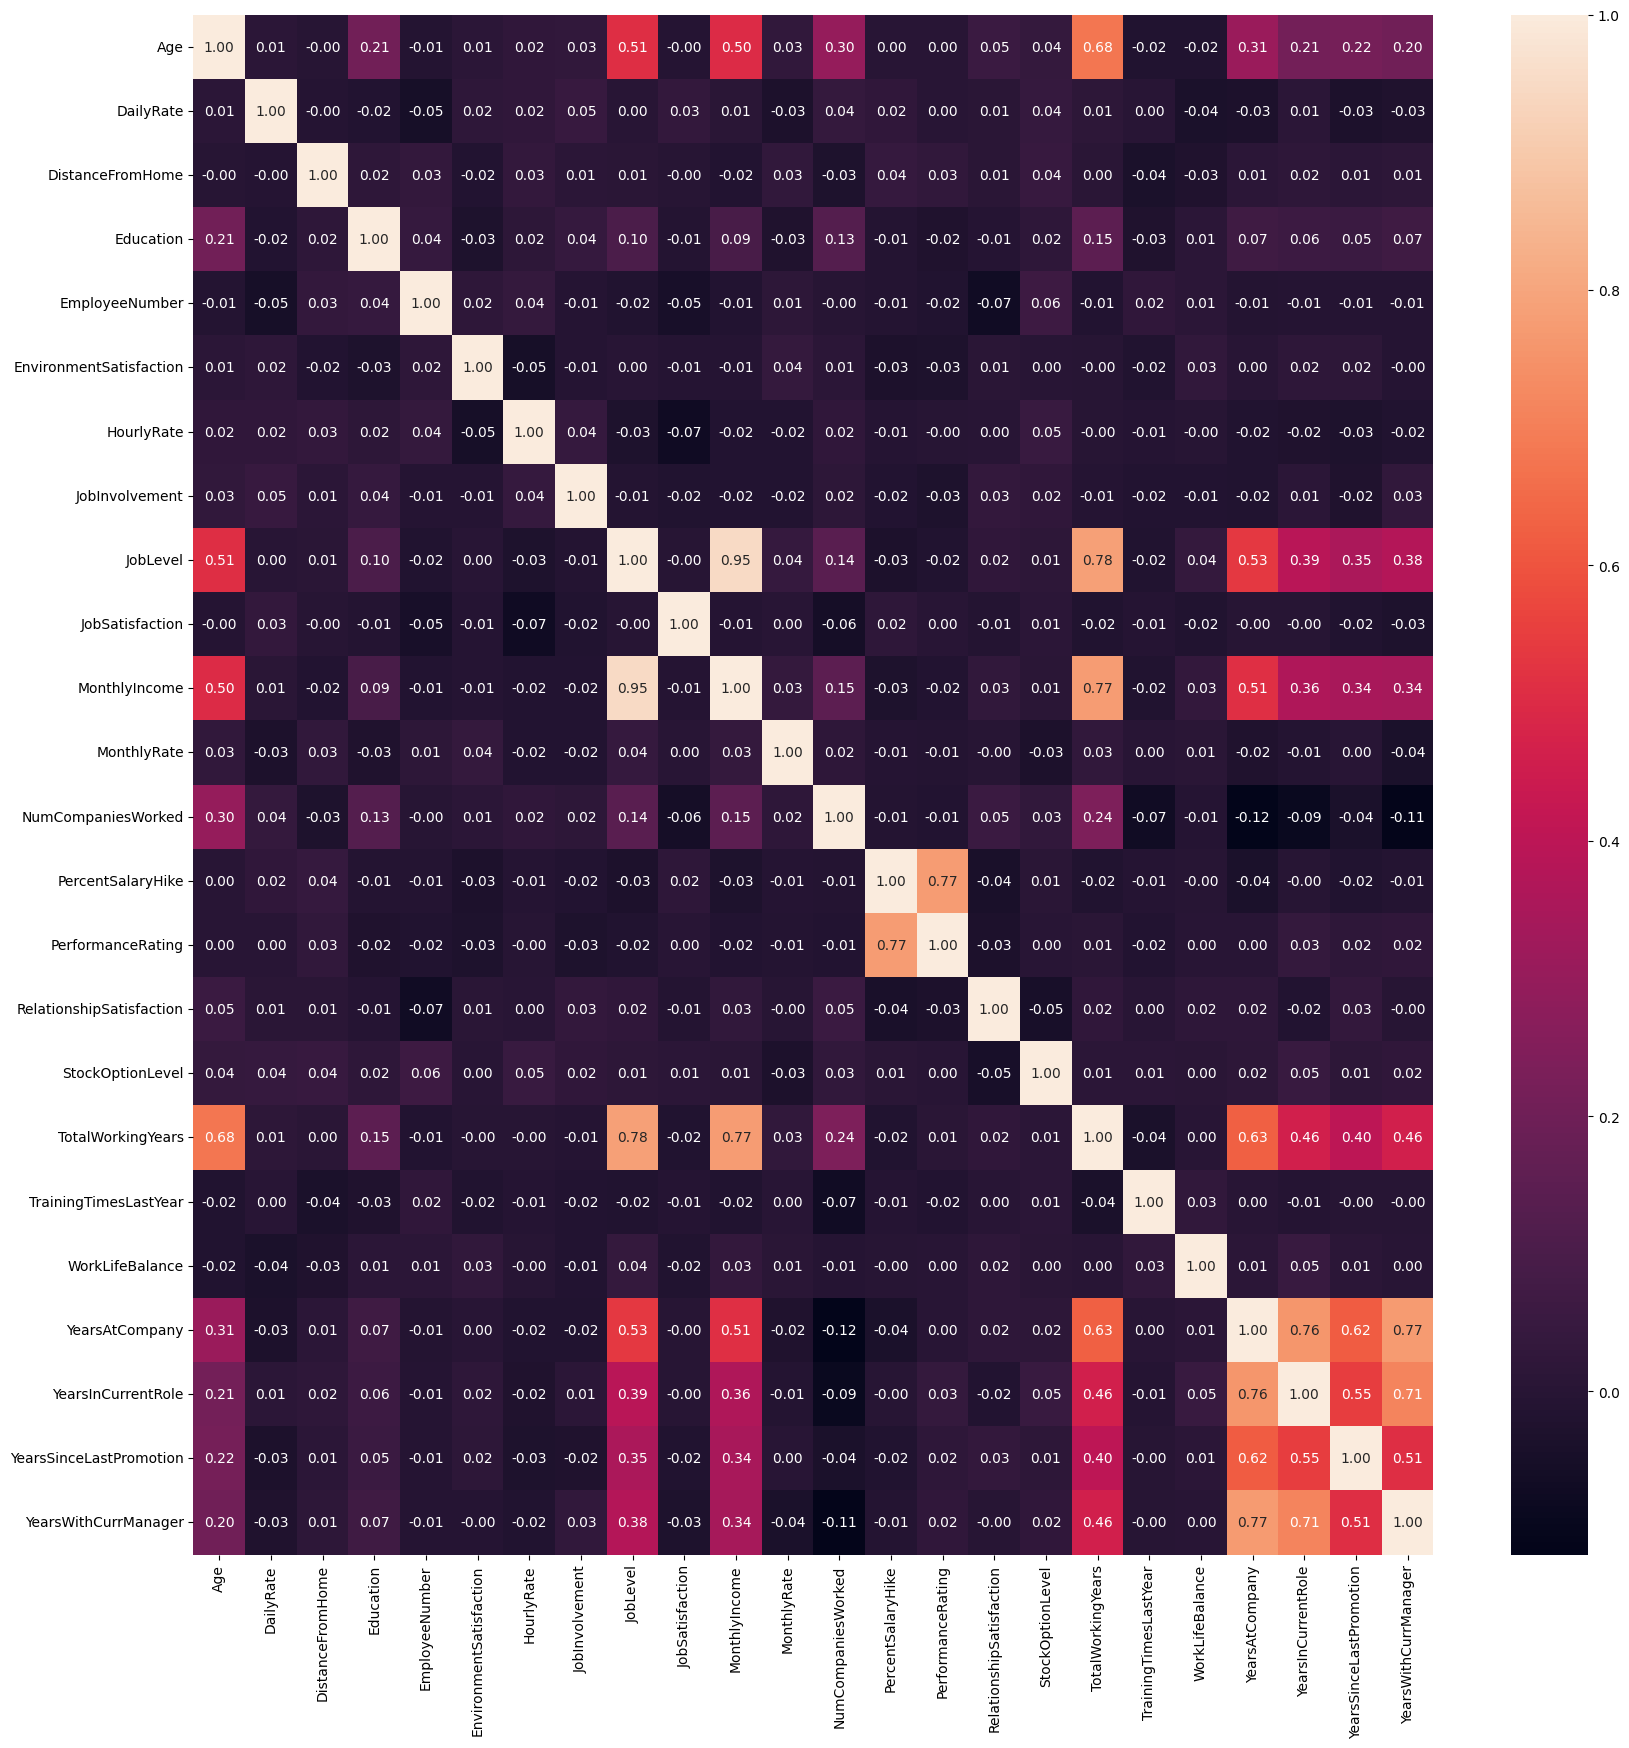

In [28]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f')

### Answer Proposed Questions

#### 1. How is Attrition Affecyed ny Gender

In [29]:
G_A=df.groupby(['Gender'])[['Attrition']].value_counts().reset_index()
G_A

,Gender,Attrition,count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


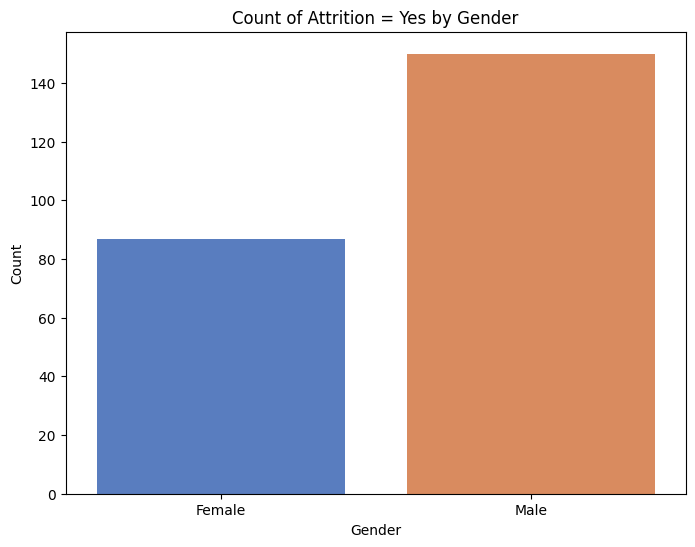

In [30]:
yes_attrition = G_A[G_A['Attrition'] == 'Yes']

plt.figure(figsize=(8, 6))
sns.barplot(data=yes_attrition, x='Gender', y='count', palette='muted')
plt.title('Count of Attrition = Yes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

No of males is greater than number of females in both(yes or no attrition)

### 2. How is Attrittion Affected by Business travels

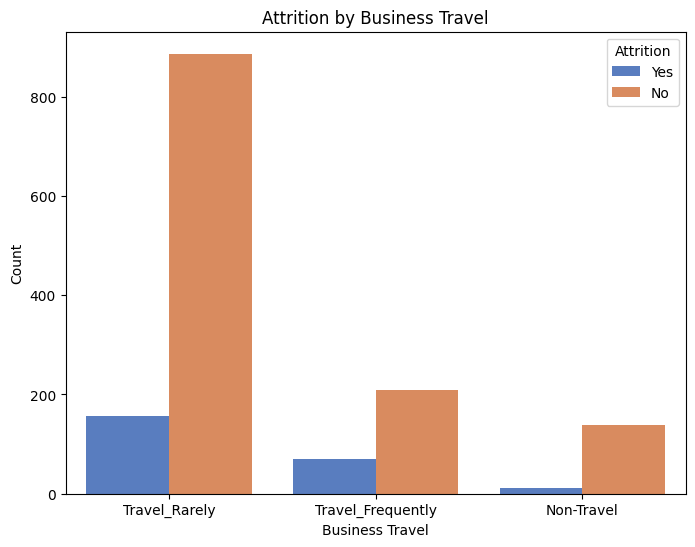

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='muted')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

### 3. what effect does Distance from home have on attrition

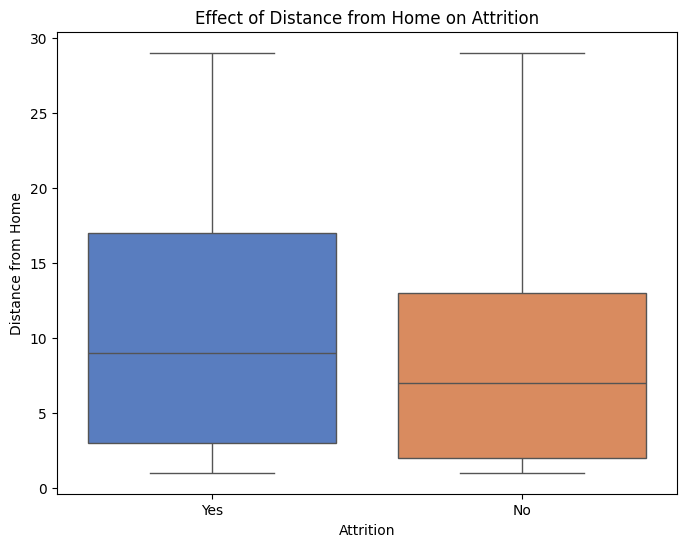

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='muted')
plt.title('Effect of Distance from Home on Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

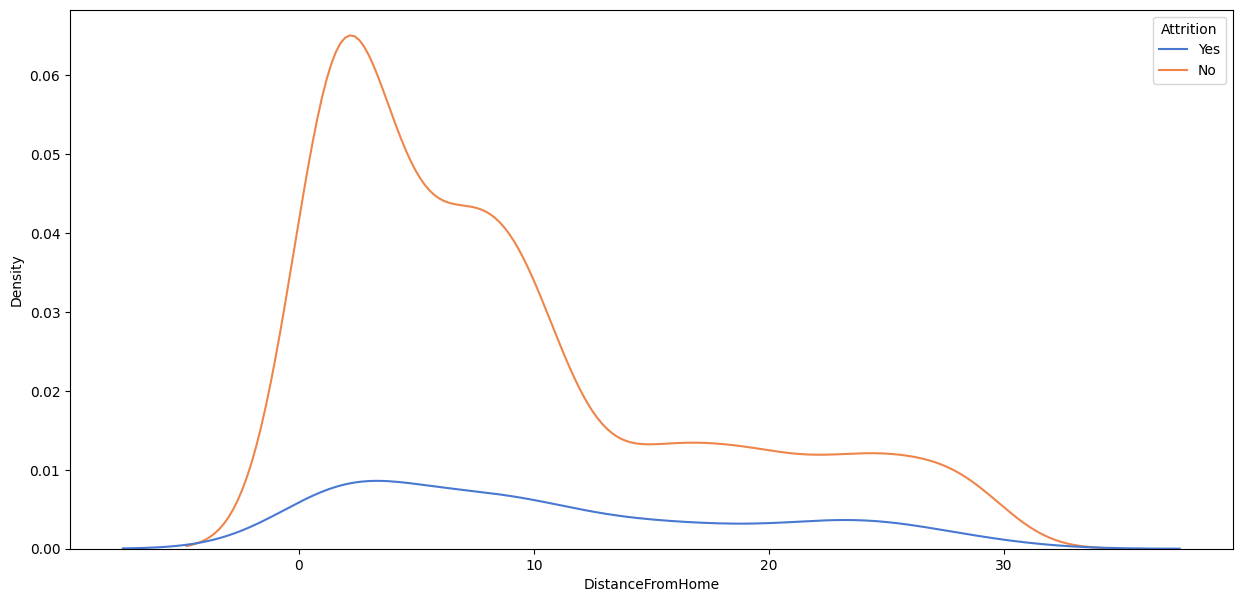

In [33]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=df, x = "DistanceFromHome", hue="Attrition", palette='muted')

### 4. What is the department with the most attritions and does the department of work have an effect on attrition

In [34]:
# Filter the DataFrame for employees with attrition
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attritions per department
attrition_by_department = attrition_data['Department'].value_counts()

# Display the department with the most attritions
most_attritions_department = attrition_by_department.idxmax()
attritions_count = attrition_by_department.max()

print(f"The department with the most attritions is '{most_attritions_department}' with {attritions_count} attritions.")

The department with the most attritions is 'Research & Development' with 133 attritions.


### 5. What is the most job role of attritions

In [35]:
# Calculate the count of attritions per job role
attrition_by_job_role = attrition_data['JobRole'].value_counts()

# Display the job role with the most attritions
most_attritions_job_role = attrition_by_job_role.idxmax()
attritions_count = attrition_by_job_role.max()

print(f"The job role with the most attritions is '{most_attritions_job_role}' with {attritions_count} attritions.")

The job role with the most attritions is 'Laboratory Technician' with 62 attritions.


### 6. What is the effect of age on attrition

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

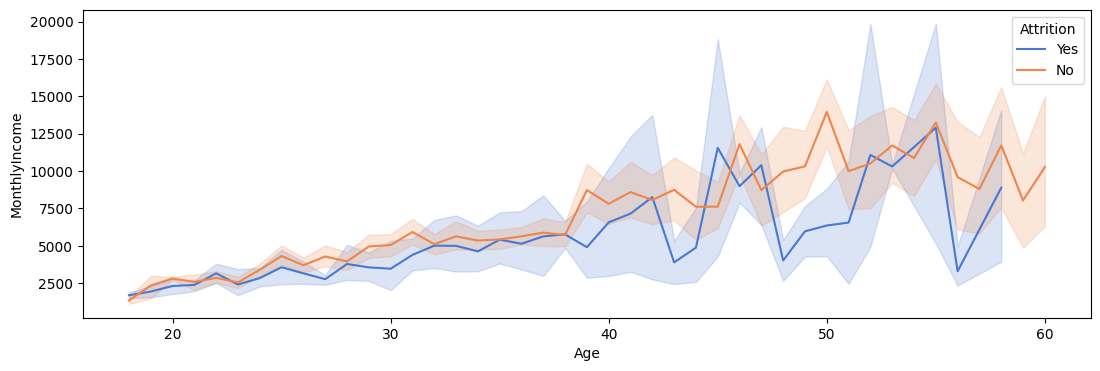

In [36]:
plt.figure(figsize=(13,4))
sns.lineplot(data=df,x='Age',y='MonthlyIncome',hue="Attrition", palette='muted')

In [37]:
maxx=df['Age'].max()
minn=df['Age'].min()
print(maxx)
print(minn)

60
18


In [38]:
interval = pd.interval_range(start= 18 , freq = 10 , end = 68)
df['Age_Interval'] = pd.cut(df['Age'] , bins = interval , labels= [])
da=df.groupby(['Attrition'])[['Age_Interval']].value_counts().reset_index()
da.set_axis(['Attrition','Age_interval','Count'],axis='columns')
da

,Attrition,Age_Interval,count
0,No,"(28, 38]",547
1,No,"(38, 48]",329
2,No,"(18, 28]",181
3,No,"(48, 58]",157
4,No,"(58, 68]",15
5,Yes,"(28, 38]",101
6,Yes,"(18, 28]",69
7,Yes,"(38, 48]",38
8,Yes,"(48, 58]",25
9,Yes,"(58, 68]",0


Text(0.5, 1.0, 'Ratio of Age and Attrition')

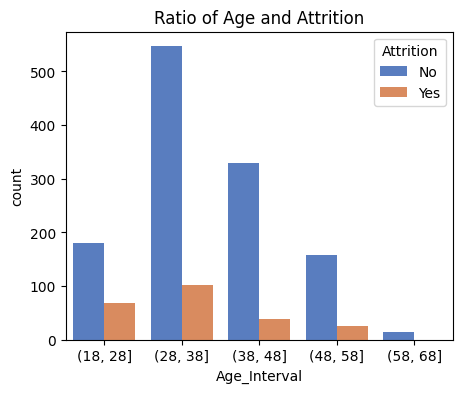

In [39]:
plt.figure(figsize=(5,4))
sns.barplot(data=da,x='Age_Interval',y='count',hue="Attrition", palette='muted')
plt.title("Ratio of Age and Attrition")

### 7. Is salary a reason for attrition


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

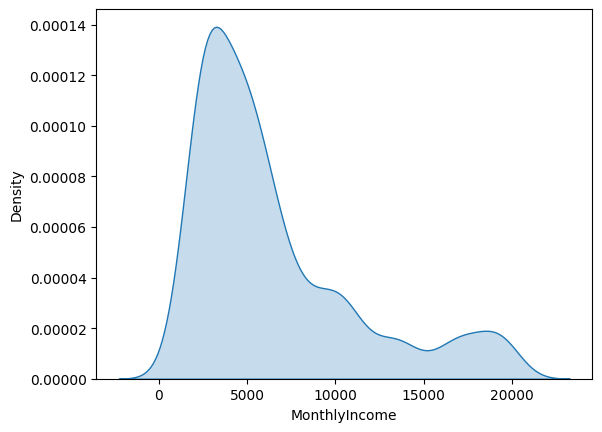

In [40]:
sns.kdeplot(data=df,x="MonthlyIncome",fill=True)

### 8. How much does Income play a role in Attrition

Text(0.5, 1.0, 'Ratio between Income and HourlyRate')

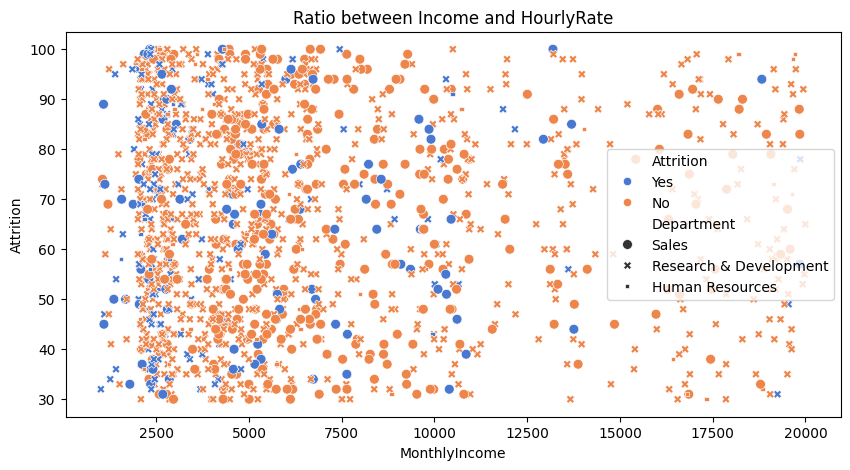

In [41]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df,x='MonthlyIncome',y='HourlyRate',hue="Attrition",style="Department",size="Department",sizes=(20,50), palette='muted')
plt.ylabel('Attrition')
plt.xlabel('MonthlyIncome')
plt.title("Ratio between Income and HourlyRate")

most employees have Monthly rate 1000 to 7500 left jobs anf alot of them at sales and research & devlopment department so may be income effect on attrition.

### 10. Which Education Field is most likely to leave

In [42]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

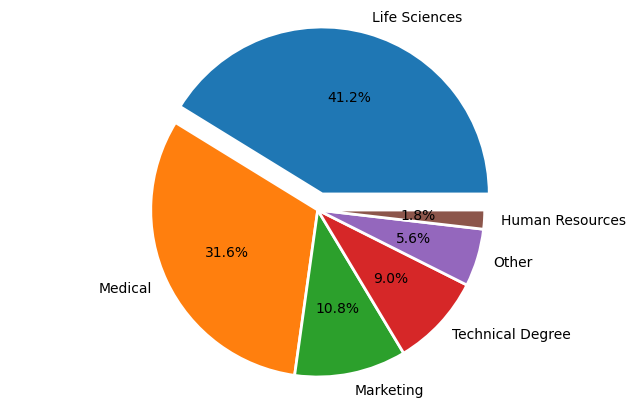

In [43]:
plt.figure(figsize = (8,5))
explode = (0.1,0,0,0,0,0)
label=['Life Sciences',"Medical","Marketing","Technical Degree","Other","Human Resources"]
plt.pie(df['EducationField'].value_counts(), explode = explode, labels = label,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "w",'linewidth' : 2})
plt.axis('equal') 
plt.show()

In [44]:
da4=df.groupby(['EducationField'])[['Attrition']].value_counts().reset_index()
da4.set_axis(['EducationField','Attrition','Count'],axis='columns')
da4

,EducationField,Attrition,count
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,517
3,Life Sciences,Yes,89
4,Marketing,No,124
5,Marketing,Yes,35
6,Medical,No,401
7,Medical,Yes,63
8,Other,No,71
9,Other,Yes,11


<Axes: xlabel='count', ylabel='EducationField'>

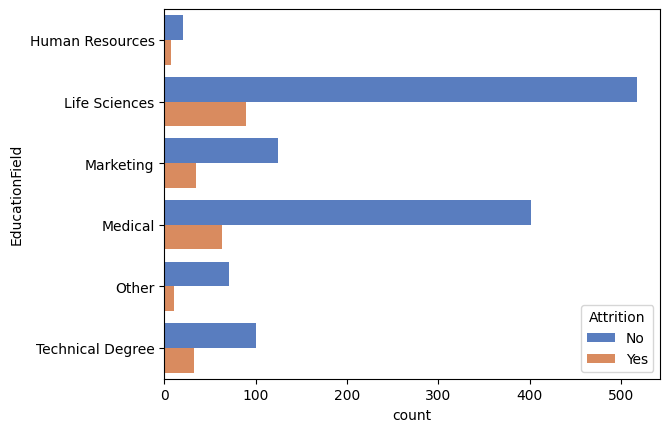

In [45]:
sns.barplot(data=da4,x="count",y="EducationField",hue="Attrition", palette='muted')

Field of Life Science is bigest field ,where employees work in it and has heigher number from left employees.

### 11. Do Education field play a role?

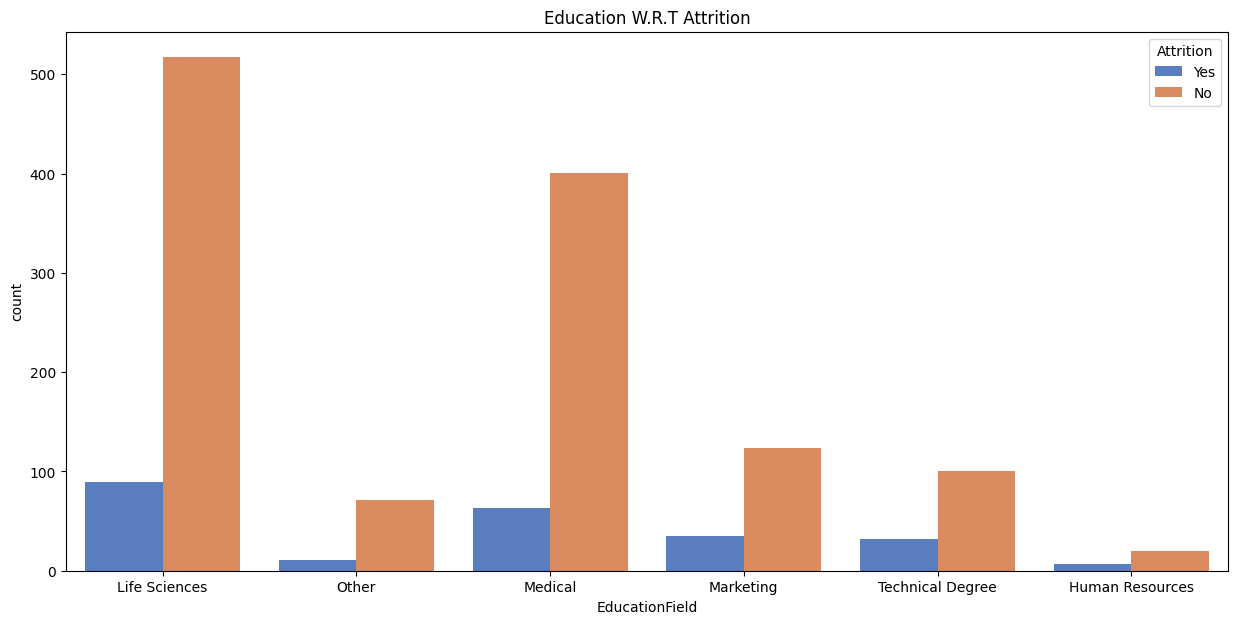

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['EducationField'], hue='Attrition', data=df, palette='muted')
plt.title("Education W.R.T Attrition")
plt.show()

### 12. Does Overtime by the employees contrinute to them leaving?

In [47]:
overtime_counts = df.groupby('OverTime')['Attrition'].value_counts().to_frame()
sizes = overtime_counts.values
labels = overtime_counts.index
labels = [labels[2][1], labels[3][1]]
overtime_counts

count
OverTime Attrition       
No       No           944
         Yes          110
Yes      No           289
         Yes          127

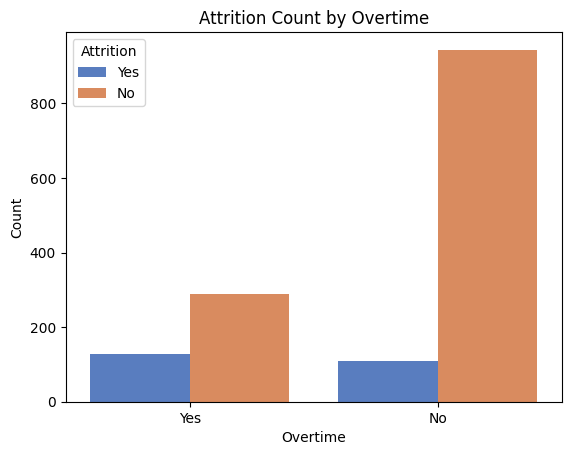

In [48]:
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='muted')
plt.title('Attrition Count by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

### How does Work Life balance impact the overa;; attrition rates

In [49]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts().to_frame()

count
WorkLifeBalance Attrition       
1               No            55
                Yes           25
2               No           286
                Yes           58
3               No           766
                Yes          127
4               No           126
                Yes           27

From this we can see that a better work-life balance might contrinute to employee retention

### 16.Is it possible that employees are leaving because of the work environment? 
### 17.How does the environment satisfaction impact attrition? 
### 18.How does self Job Satisfaction impact the Attrition?

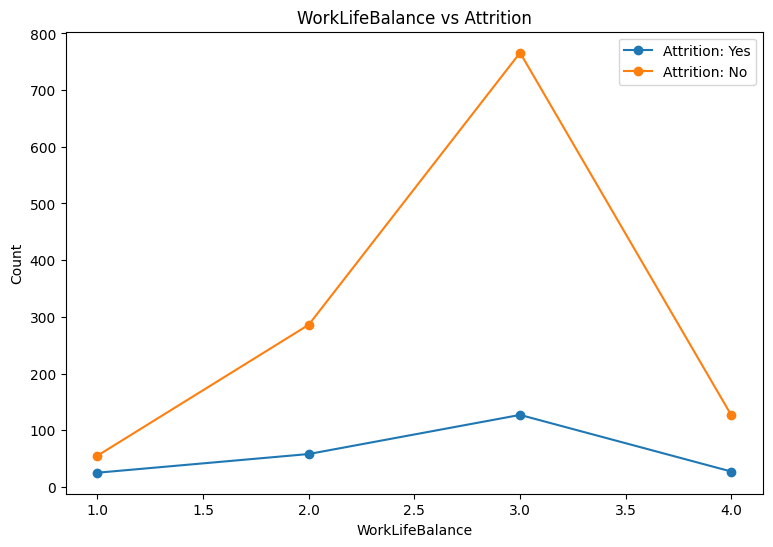

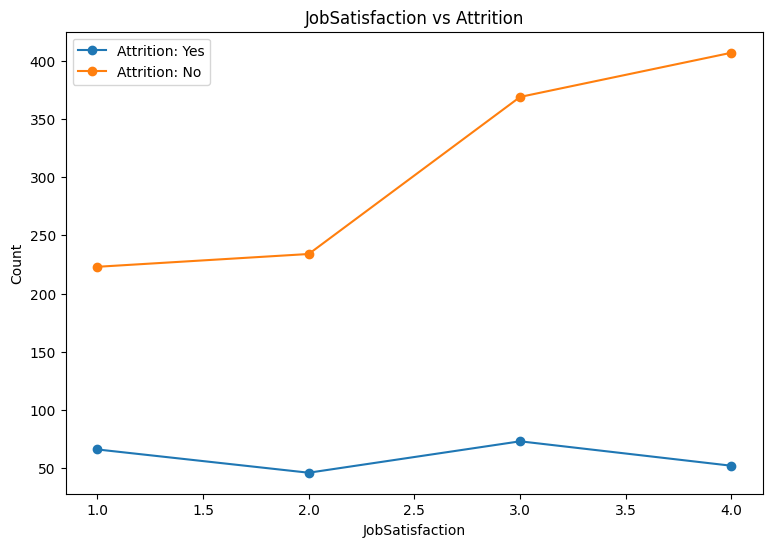

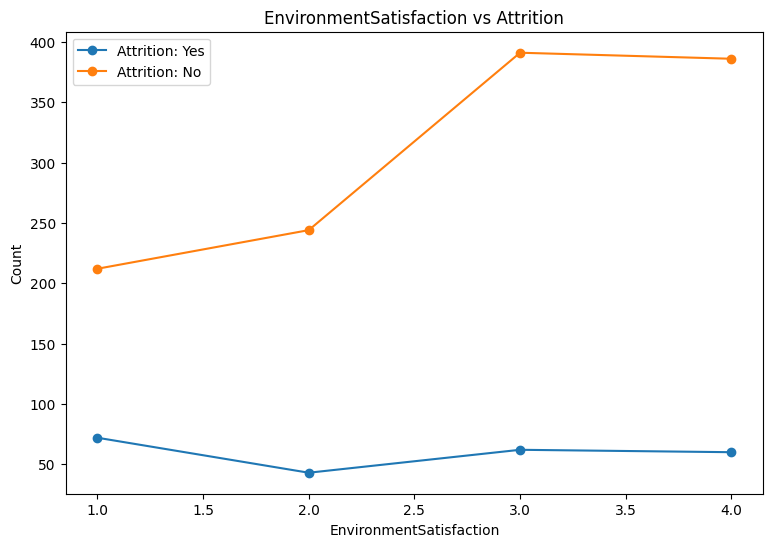

In [50]:
factors = ['WorkLifeBalance', 'JobSatisfaction', 'EnvironmentSatisfaction']

for factor in factors:
    plt.figure(figsize=(9, 6))
    for attrition_category in df['Attrition'].unique():
        data_attrition = df[df['Attrition'] == attrition_category]
        plt.plot(
            data_attrition.groupby(factor).size().index,
            data_attrition.groupby(factor).size().values,
            marker='o',
            label=f'Attrition: {attrition_category}'
        )
    
    plt.title(f'{factor} vs Attrition')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

### 19. How does an employee work experience affect attrition

In [51]:
attrition_rates = attrition_data.groupby('TotalWorkingYears')['Attrition'].value_counts().unstack()
attrition_data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,19,3,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,27,3,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,31,2,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,2027,1,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,2032,4,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2044,2,...,3,4,2,12,3,3,6,3,0,1


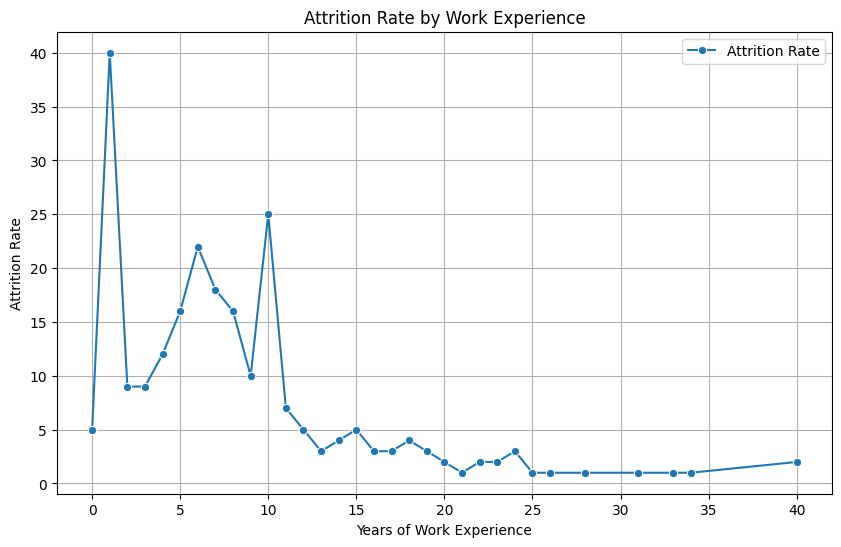

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=attrition_rates.reset_index(), x='TotalWorkingYears', y='Yes', marker='o', label='Attrition Rate')
plt.title('Attrition Rate by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Attrition Rate')
plt.legend()
plt.grid(True)
plt.show()

### 20. .Are more educated people more likely to leave?

In [53]:
# Calculate attrition rates for each education level
attrition_rates_education = df.groupby('Education')['Attrition'].value_counts().unstack().fillna(0)
attrition_rates_education

Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


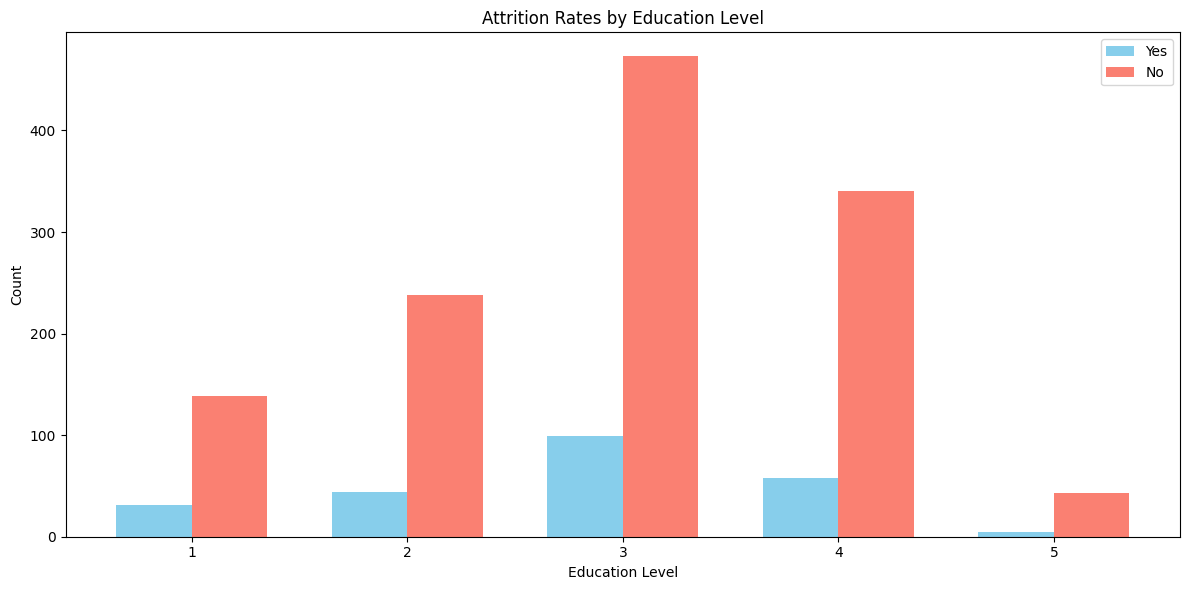

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(5)

# Plotting 'Yes' counts
bar1 = plt.bar(index, attrition_rates_education['Yes'], bar_width, label='Yes', color='skyblue')
# Plotting 'No' counts
bar2 = plt.bar([i + bar_width for i in index], attrition_rates_education['No'], bar_width, label='No', color='salmon')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Attrition Rates by Education Level')
plt.xticks([i + bar_width / 2 for i in index], attrition_rates_education.index)
plt.legend()
plt.tight_layout()
plt.show()

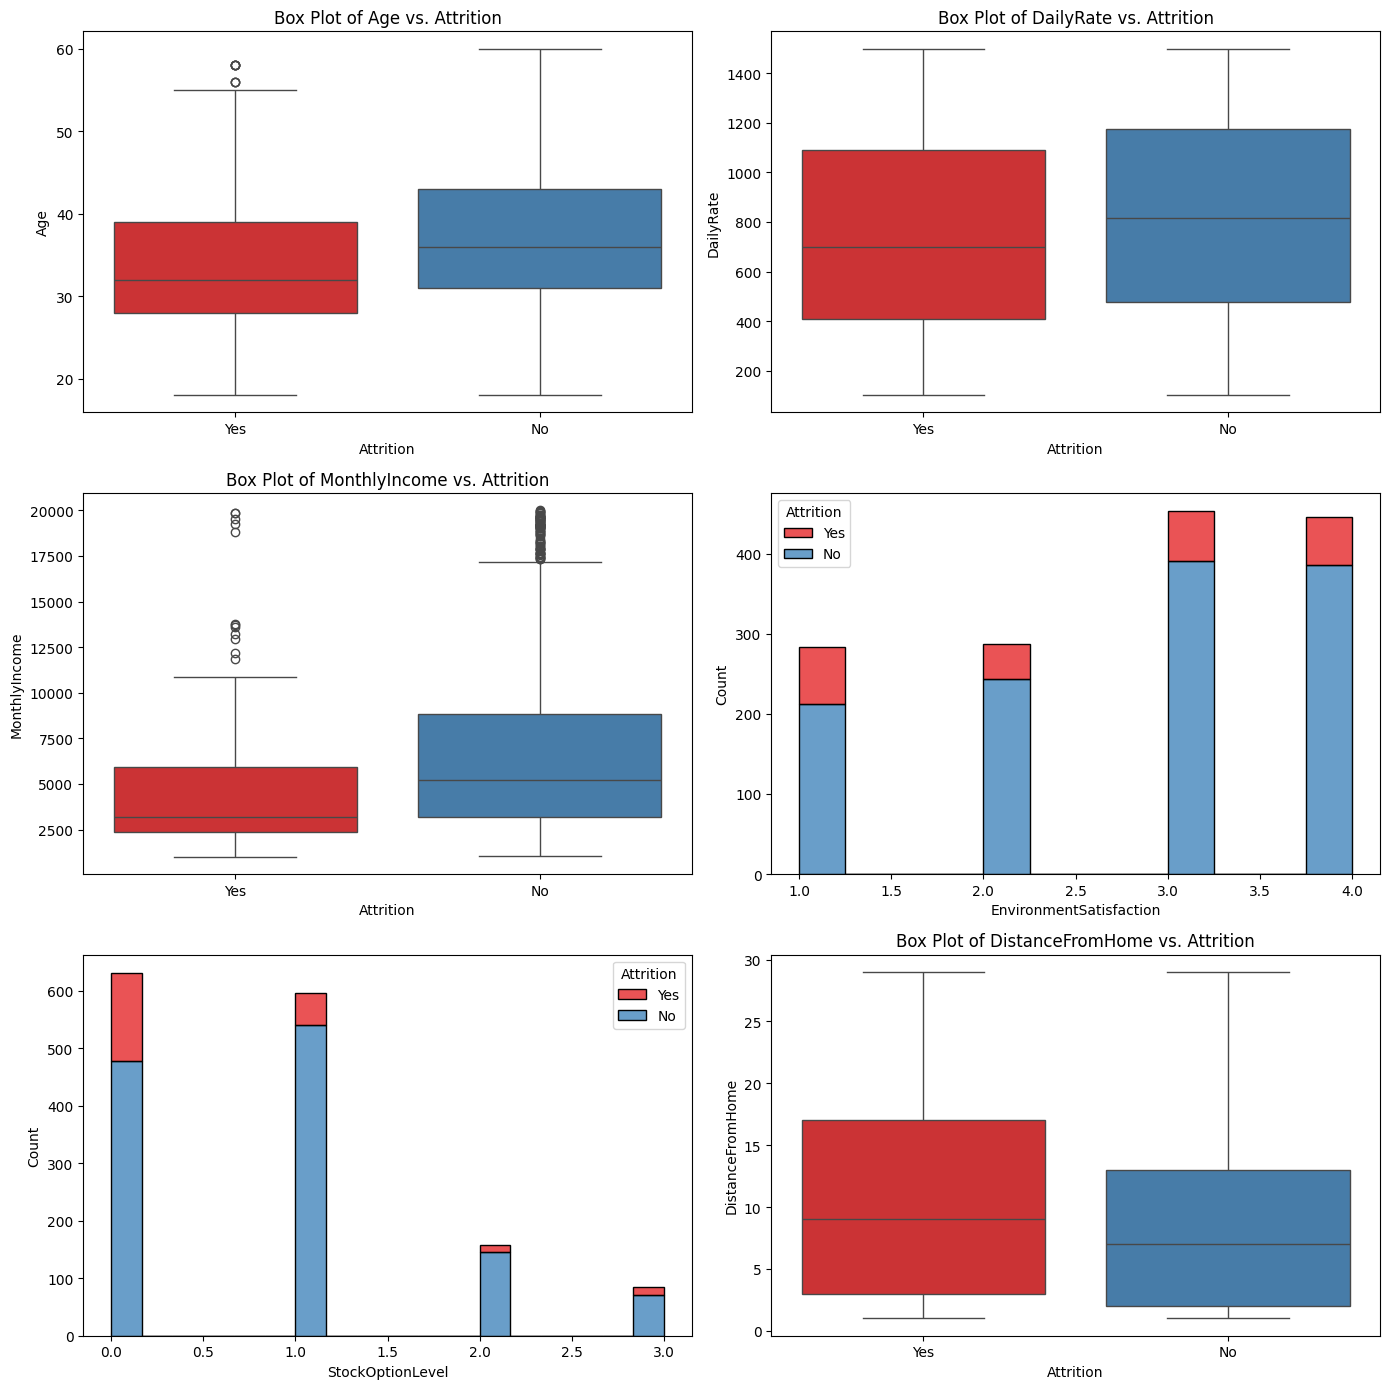

In [55]:
# Visualizing the numeric variables vs Attrition variable

# A 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14), constrained_layout=True)

# Subplot 1
sns.boxplot(x='Attrition', y='Age', data=df, palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of Age vs. Attrition", fontsize=12)

# Subplot 2
sns.boxplot(x='Attrition', y='DailyRate', data=df, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of DailyRate vs. Attrition", fontsize=12)

# Subplot 3
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of MonthlyIncome vs. Attrition", fontsize=12)

# Subplot 4
sns.histplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', multiple='stack', palette='Set1', ax=axes[1, 1])
plt.title("Histogram of EnvironmentSatisfaction vs. Attrition", fontsize=12)

# Subplot 5
sns.histplot(data=df, x='StockOptionLevel', hue='Attrition', multiple='stack', palette='Set1', ax=axes[2, 0])
plt.title("Histogram of StockOptionLevel vs. Attrition", fontsize=12)

# Subplot 6
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, palette='Set1', ax=axes[2, 1])
axes[2, 1].set_title("Box Plot of DistanceFromHome vs. Attrition", fontsize=12)

# Adjust layout with vertical padding
plt.tight_layout()

# Show the plot
plt.show()

#### The graphs show that these employees are more prone to attrition:

Younger age

With a lower daily rate

With a lower monthly income

Working farther from home

Having a lower Stock Option Level


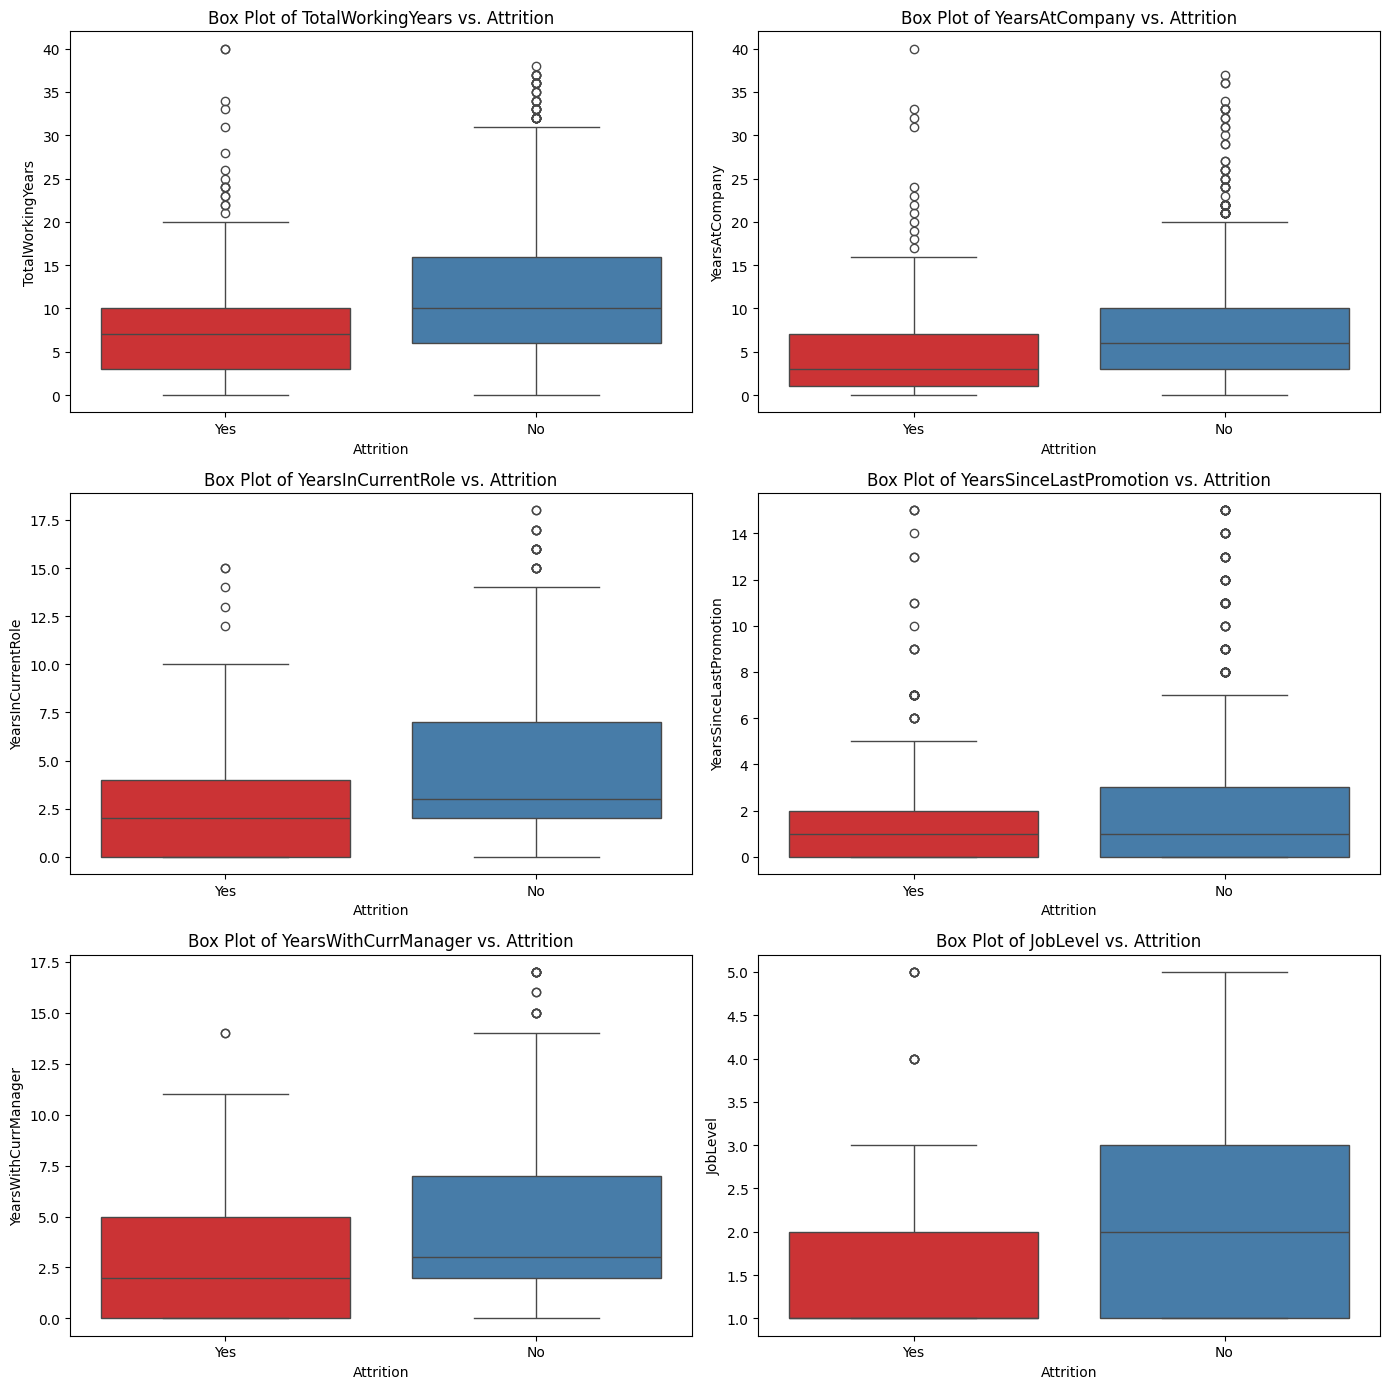

In [56]:
# Visualizing the numeric variables vs Attrition variable
# Here we are more interested with the variables that we can describe as "experience"

# A 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14), constrained_layout=True)

# Subplot 1
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of TotalWorkingYears vs. Attrition", fontsize=12)

# Subplot 2
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of YearsAtCompany vs. Attrition", fontsize=12)

# Subplot 3
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of YearsInCurrentRole vs. Attrition", fontsize=12)

# Subplot 4
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of YearsSinceLastPromotion vs. Attrition", fontsize=12)

# Subplot 5
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, palette='Set1', ax=axes[2, 0])
axes[2, 0].set_title("Box Plot of YearsWithCurrManager vs. Attrition", fontsize=12)

# Subplot 6
sns.boxplot(x='Attrition', y='JobLevel', data=df, palette='Set1', ax=axes[2, 1])
axes[2, 1].set_title("Box Plot of JobLevel vs. Attrition", fontsize=12)

# Adjust layout with vertical padding
plt.tight_layout()

# Show the plot
plt.show()

###  The graphs show that these employees are more prone to attrition:

Having less Total working years

Having less Years it current company

Having less Years in current role

Having less Years with current manager

Having lower Job level

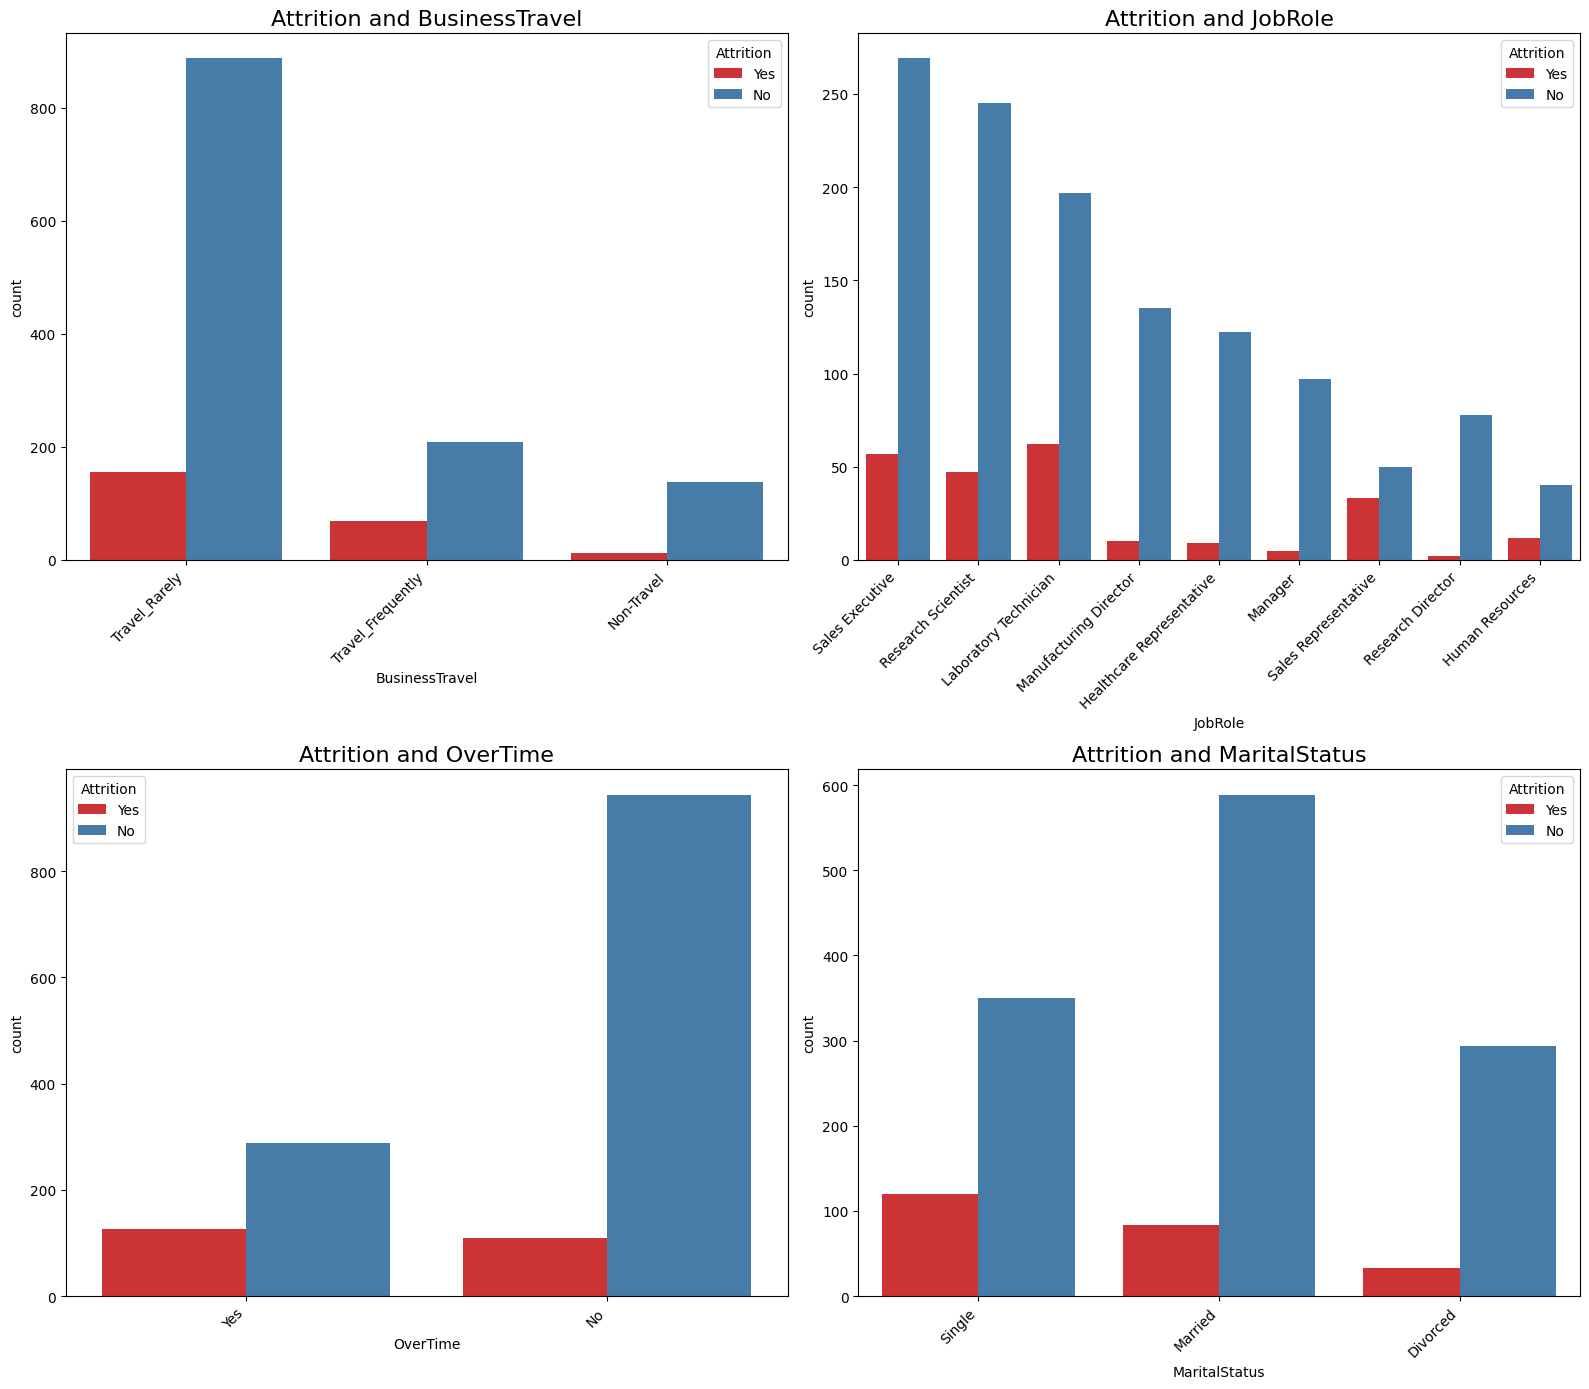

In [57]:
# Visualizing categorical variables vs Attrition variable

# A 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))

# Subplot 1
ax1 = sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='Set1', ax=axes[0, 0])
ax1.set_title("Attrition and BusinessTravel", fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Subplot 2
ax2 = sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set1', ax=axes[0, 1])
ax2.set_title("Attrition and JobRole", fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

# Subplot 3
ax3 = sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set1', ax=axes[1, 0])
ax3.set_title("Attrition and OverTime", fontsize=16)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")

# Subplot 4
ax4 = sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='Set1', ax=axes[1, 1])
ax4.set_title("Attrition and MaritalStatus", fontsize=16)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

###  These employees are more prone to attrition:

Traveling frequently

Working as Sales Representatives

Working overtime

Single

## FEATURE ENGINEERING


##### One Hot Encoding

In [58]:
df = pd.get_dummies(data=df, drop_first=True)

In [59]:
df.info

<bound method DataFrame.info of       Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0      41       1102                 1          2               1   
1      49        279                 8          1               2   
2      37       1373                 2          2               4   
3      33       1392                 3          4               5   
4      27        591                 2          1               7   
...   ...        ...               ...        ...             ...   
1465   36        884                23          2            2061   
1466   39        613                 6          1            2062   
1467   27        155                 4          3            2064   
1468   49       1023                 2          3            2065   
1469   34        628                 8          3            2068   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2 

### Correlation Diagram

Text(0.5, 1.0, 'Correlation of Features with Class')

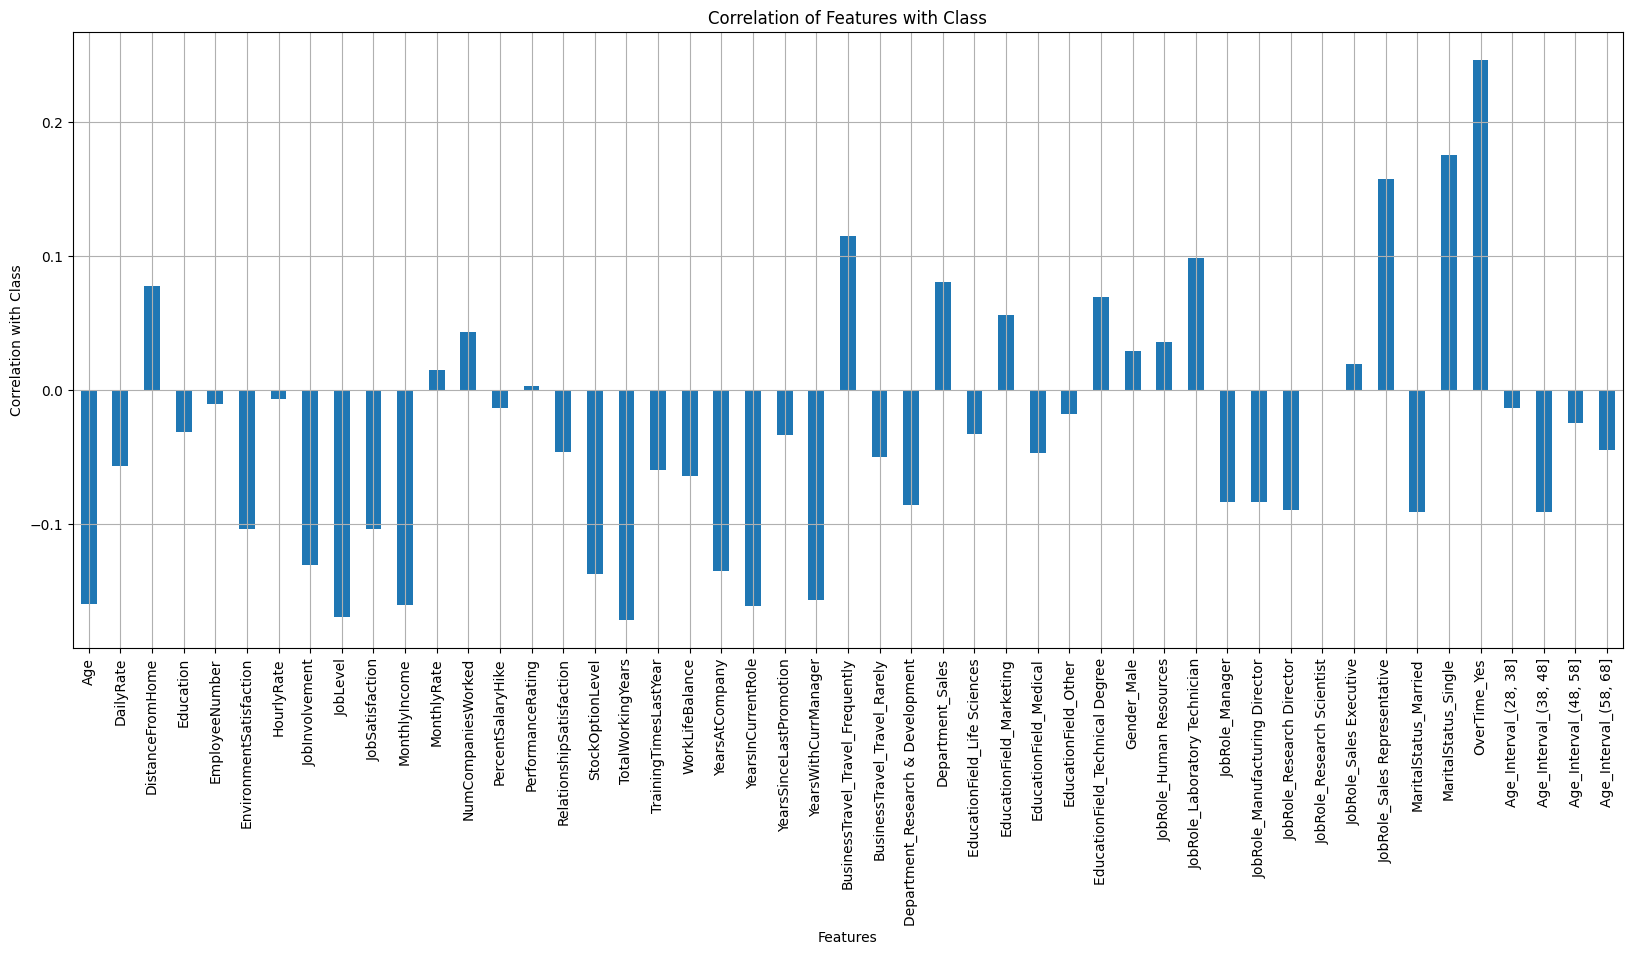

In [60]:
df_2 = df.drop(columns='Attrition_Yes')
df_2.corrwith(df['Attrition_Yes']).plot.bar(figsize=(20,8), grid=True)

plt.xlabel("Features")  # Label for the x-axis (features)
plt.ylabel("Correlation with Class")  # Label for the y-axis (correlation values)
plt.title("Correlation of Features with Class")  # Set the title for the bar plot

### Here we've got the confirmation to our previous ideas:

These employees are more prone to attrition:

Of younger age

With a lower daily rate

With a lower monthly income

Working farther from home

Having a lower Stock Option Level

Having less Total working years

Having less Years it current company

Having less Years in current role

Having less Years with current manager

Having lower Job level

Traveling frequently

Working as Sales Representatives

Working overtime

Single


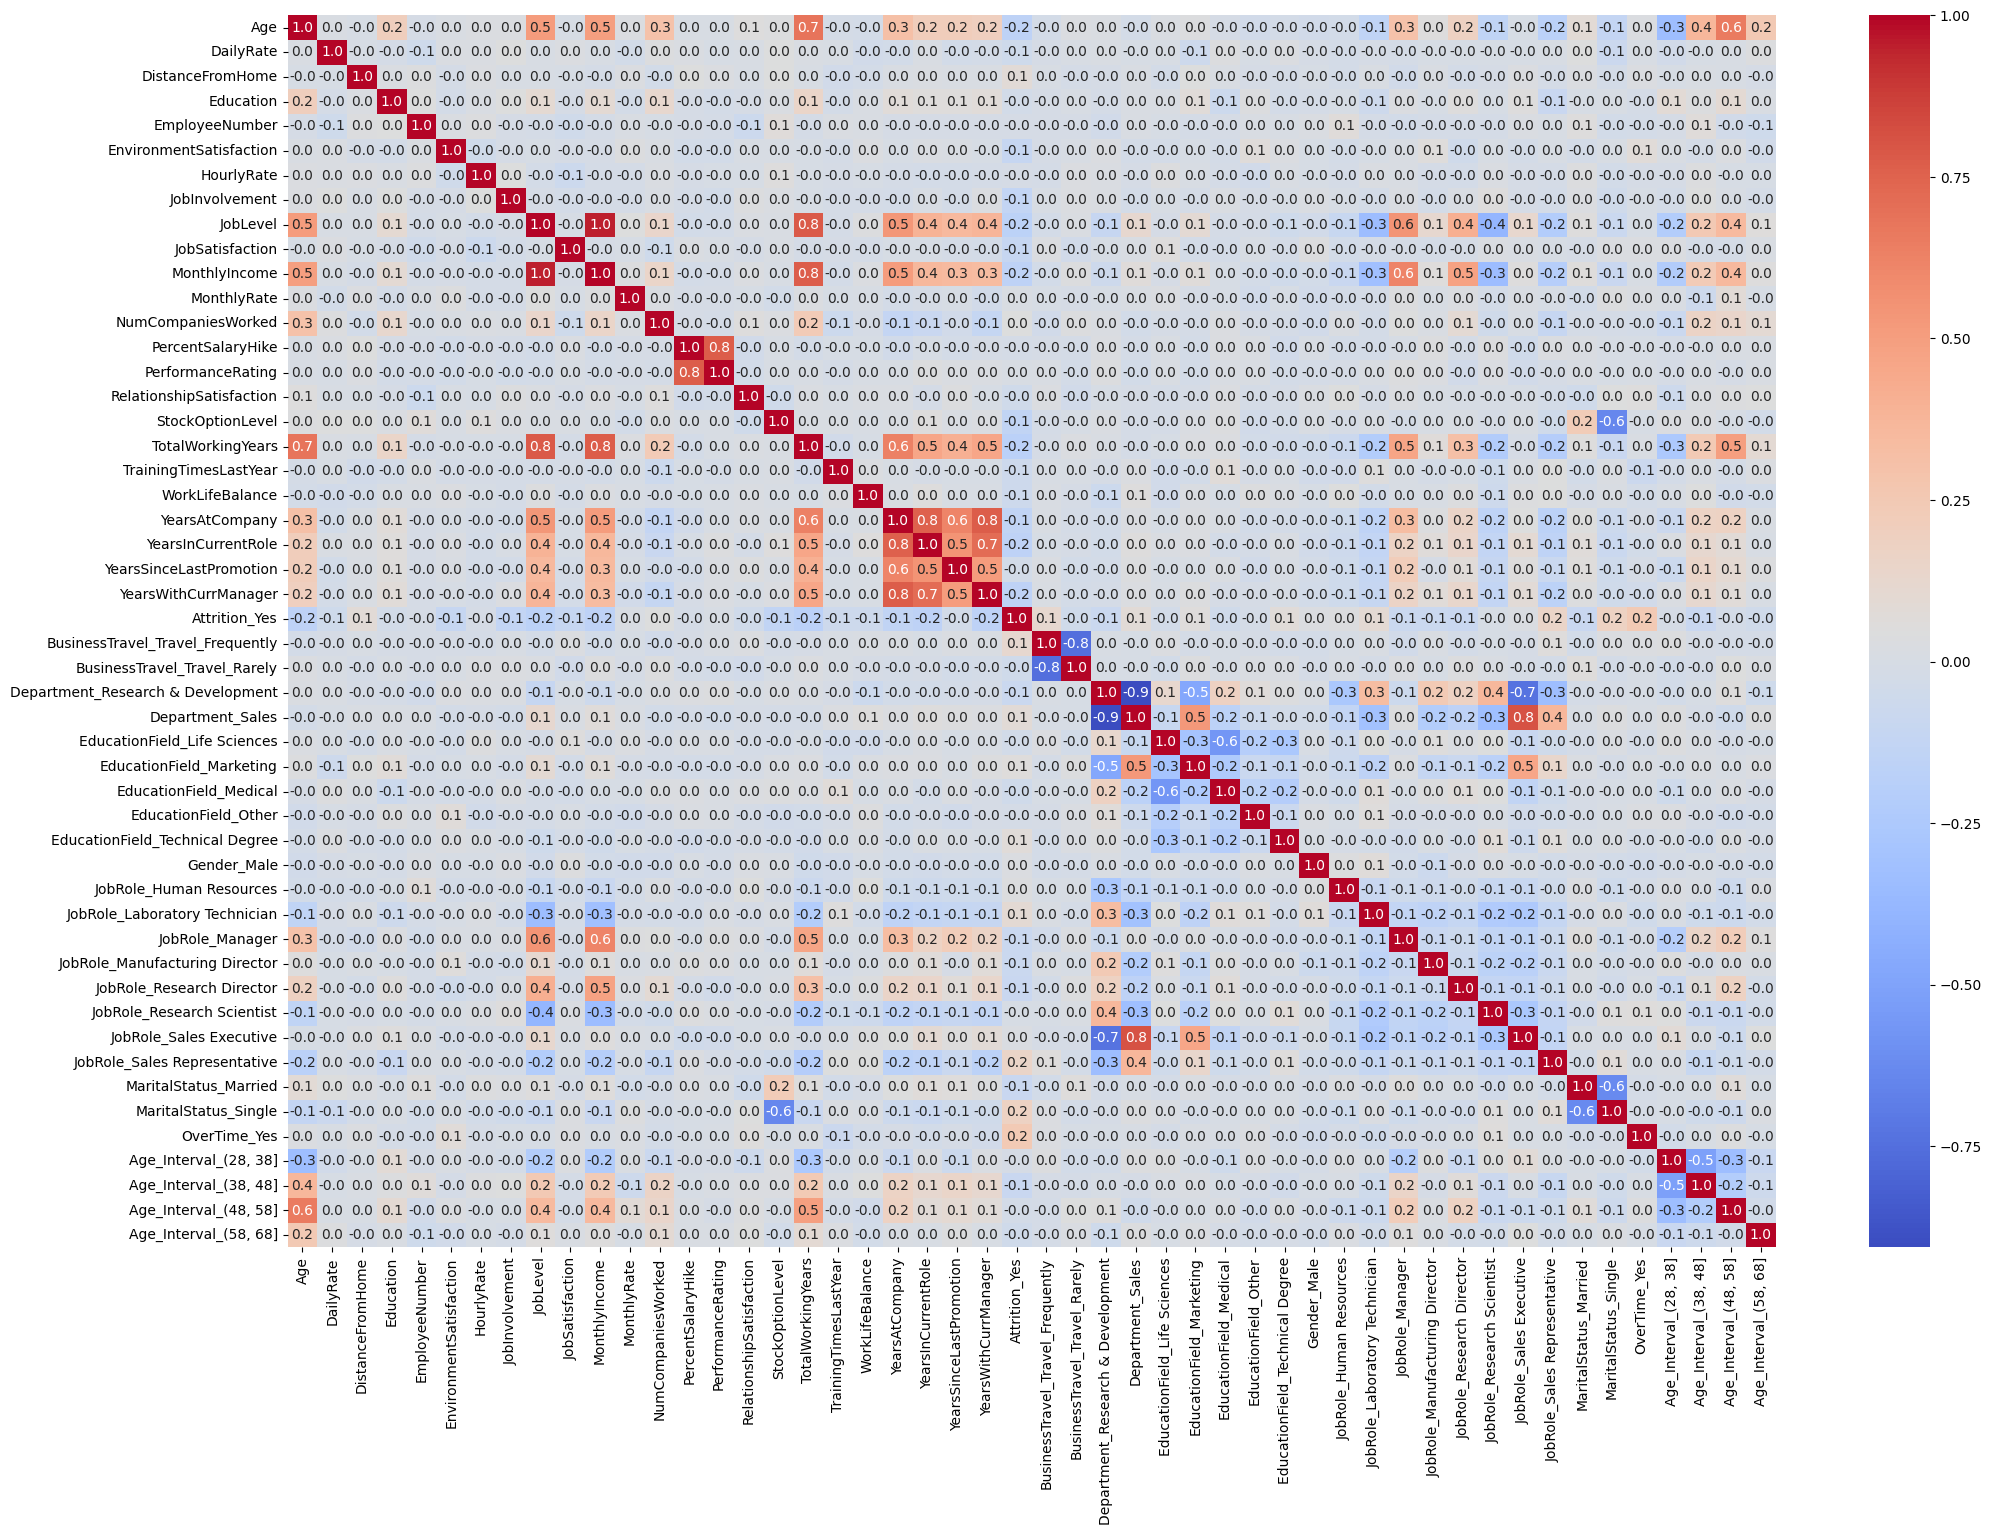

In [61]:
# Heatmap

# Calculate the correlation matrix
corr = df.corr()

# Set up the heatmap figure
plt.figure(figsize=(24, 16))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")

plt.show()

In [62]:
# We see very high correlation between MonthlyIncome and JobLevel

correlation = df['MonthlyIncome'].corr(df['JobLevel'])

print(f"Correlation between MonthlyRate and JobLevel: {correlation}")

Correlation between MonthlyRate and JobLevel: 0.9502999134798443


In [63]:
# Drop the specified columns
columns_to_drop = ['EmployeeNumber', 'Age_Interval_(28, 38]', 'Age_Interval_(38, 48]', 
                   'Age_Interval_(48, 58]', 'Age_Interval_(58, 68]']
df.drop(columns=columns_to_drop, inplace=True)


In [64]:
df.to_csv('new_df.csv', index=False)
